<a href="https://colab.research.google.com/github/nithun-rajan/Sharpe-Ratio-Risk-Return-Analysis/blob/main/Sharpe_Ratio_%26_Risk%E2%80%93Return_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install pandas numpy matplotlib yfinance

In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Professor William Sharpe introduced reward-to-variablity ratio in 1966 that soon came to be called Sharpe ratio. It nothing but Rewards/Risk . A higher sharpe ratio means that the reward will be higher fir a given amount of risk

In [65]:
plt.style.use('fivethirtyeight')
%matplotlib inline

import pandas_datareader.data as web
from datetime import datetime

start = '2022-1-1'   # January 1, 2022
end = '2024-6-25'     # June 25, 2025

msft = yf.download('MSFT', start=start , end=end)
amazon = yf.download('AMZN', start=start, end=end)

print(msft.head())

/tmp/ipython-input-65-4140376325.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download('MSFT', start=start , end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-65-4140376325.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amazon = yf.download('AMZN', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2022-01-03  325.038055  328.193765  320.212247  325.620654  28865100
2022-01-04  319.464600  325.475014  316.658432  325.115724  32674300
2022-01-05  307.201019  316.609890  306.812630  316.405962  40054300
2022-01-06  304.773560  309.453726  302.452885  304.064728  39646100
2022-01-07  304.928955  307.317576  301.093542  305.035749  32720000


In [66]:
msft_close = msft.iloc[: , 0]
amazon_close = amazon['Close']

print(msft_close)
print(amazon_close)

stocks = pd.concat([amazon_close , msft_close], axis =1)
stocks.columns = ['MSFT', 'Amazon']
print(stocks)



Date
2022-01-03    325.038055
2022-01-04    319.464600
2022-01-05    307.201019
2022-01-06    304.773560
2022-01-07    304.928955
                 ...    
2024-06-17    444.958527
2024-06-18    442.943970
2024-06-20    442.308868
2024-06-21    446.357819
2024-06-24    444.263855
Name: (Close, MSFT), Length: 621, dtype: float64
Ticker            AMZN
Date                  
2022-01-03  170.404495
2022-01-04  167.522003
2022-01-05  164.356995
2022-01-06  163.253998
2022-01-07  162.554001
...                ...
2024-06-17  184.059998
2024-06-18  182.809998
2024-06-20  186.100006
2024-06-21  189.080002
2024-06-24  185.570007

[621 rows x 1 columns]
                  MSFT      Amazon
Date                              
2022-01-03  170.404495  325.038055
2022-01-04  167.522003  319.464600
2022-01-05  164.356995  307.201019
2022-01-06  163.253998  304.773560
2022-01-07  162.554001  304.928955
...                ...         ...
2024-06-17  184.059998  444.958527
2024-06-18  182.809998  442.94397

In [67]:
sp500 = yf.download('^GSPC', start , end )
print(sp500.head())

sp500.iloc[ :, 0]

/tmp/ipython-input-67-262697563.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start , end )
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2022-01-03  4796.560059  4796.640137  4758.169922  4778.140137  3831020000
2022-01-04  4793.540039  4818.620117  4774.270020  4804.509766  4683170000
2022-01-05  4700.580078  4797.700195  4699.439941  4787.990234  4887960000
2022-01-06  4696.049805  4725.009766  4671.259766  4693.390137  4295280000
2022-01-07  4677.029785  4707.950195  4662.740234  4697.660156  4181510000


,Close
,^GSPC
Date,
2022-01-03,4796.560059
2022-01-04,4793.540039
2022-01-05,4700.580078
2022-01-06,4696.049805
2022-01-07,4677.029785
...,...
2024-06-17,5473.229980
2024-06-18,5487.029785


In [68]:
benchmark = sp500.iloc[:,0]
benchmark = pd.DataFrame(benchmark)
benchmark.columns = ['S&P 500']
print(benchmark.columns)

Index(['S&P 500'], dtype='object')


Visualisng the Stock data

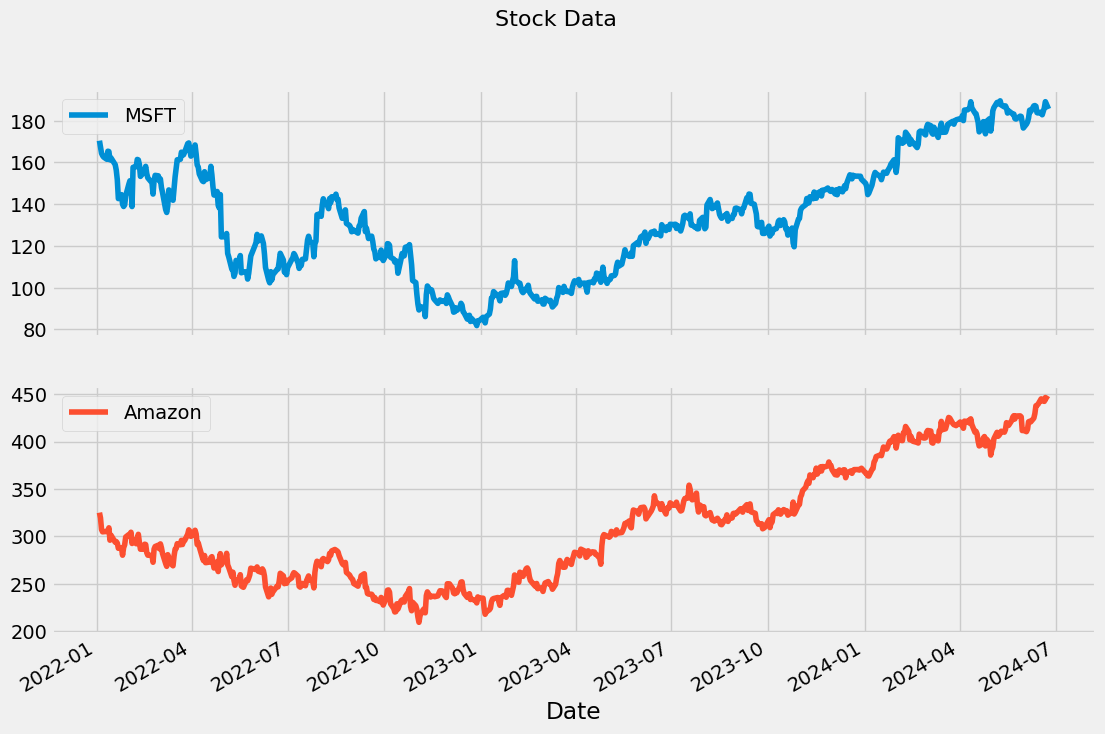

In [69]:
import matplotlib.pyplot as plt

axes = stocks.plot(subplots=True, figsize=(12, 8), title="Stock Data")
plt.suptitle("Stock Data", fontsize=16)  # Super title for all subplots
plt.show()


,S&P 500
count,621.000000
mean,4368.520906
std,448.921817
min,3577.030029
25%,4008.010010
50%,4300.169922
75%,4576.729980
max,5487.029785


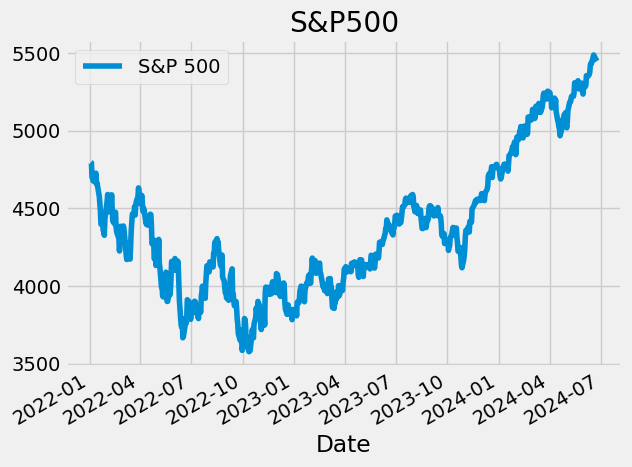

In [70]:
benchmark.plot(title ='S&P500')
benchmark.describe()

,MSFT,Amazon
count,620.000000,620.000000
mean,0.000450,0.000669
std,0.025015,0.018175
min,-0.140494,-0.077156
25%,-0.013922,-0.009641
50%,0.000233,0.000492
75%,0.014681,0.011256
max,0.135359,0.082268


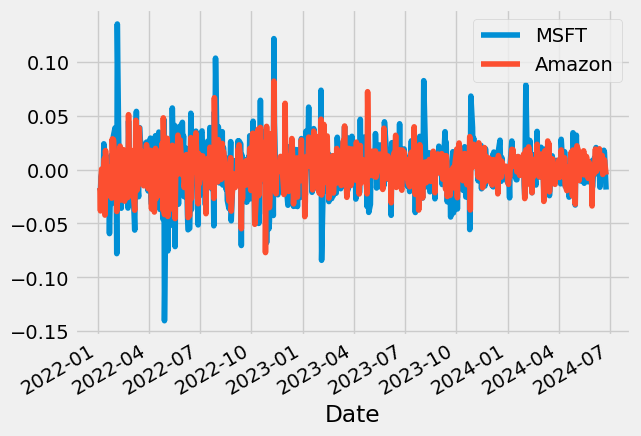

In [71]:
daily_returns = stocks.pct_change()
daily_returns.plot()

daily_returns.describe()

,S&P 500
count,620.000000
mean,0.000271
std,0.011431
min,-0.043237
25%,-0.006167
50%,0.000005
75%,0.007030
max,0.055434


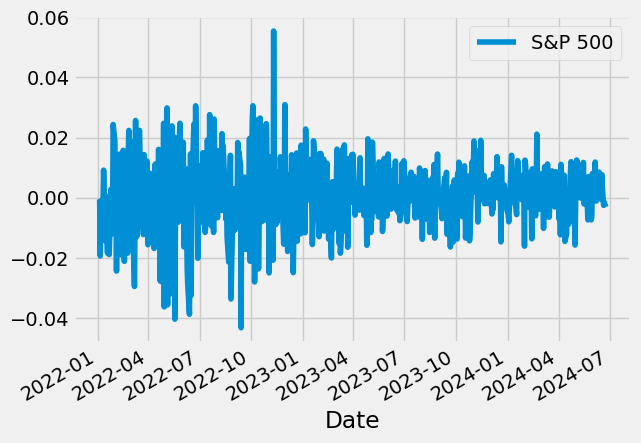

In [72]:
sp_daily_returns=benchmark.pct_change()

sp_daily_returns.plot()
sp_daily_returns.describe()


                MSFT    Amazon
Date                          
2022-01-03       NaN       NaN
2022-01-04 -0.016286 -0.016517
2022-01-05  0.000500 -0.018995
2022-01-06 -0.005747 -0.006938
2022-01-07 -0.000238  0.004560
...              ...       ...
2024-06-17 -0.005486  0.005441
2024-06-18 -0.009313 -0.007049
2024-06-20  0.020523  0.001092
2024-06-21  0.017575  0.010716
2024-06-24 -0.015498 -0.001626

[621 rows x 2 columns]


,MSFT,Amazon
count,620.000000,620.000000
mean,0.000179,0.000398
std,0.018306,0.011350
min,-0.104210,-0.069769
25%,-0.009296,-0.005935
50%,-0.000854,-0.000039
75%,0.009549,0.006246
max,0.130202,0.076276


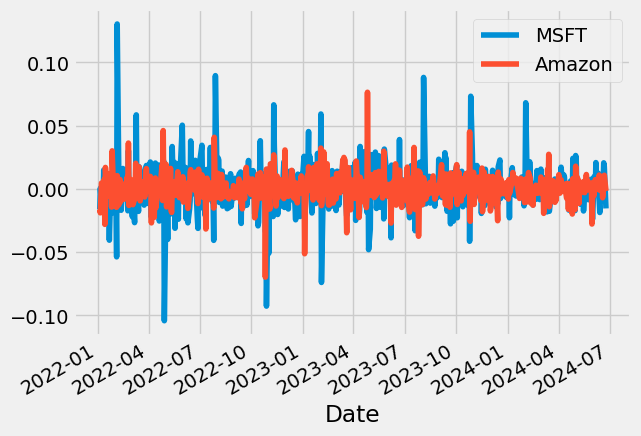

In [73]:
excess_returns = daily_returns.sub(sp_daily_returns['S&P 500'], axis=0)

print(excess_returns)
excess_returns.plot()
excess_returns.describe()

The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500

,0
count,2.000000
mean,0.000289
std,0.000155
min,0.000179
25%,0.000234
50%,0.000289
75%,0.000343
max,0.000398


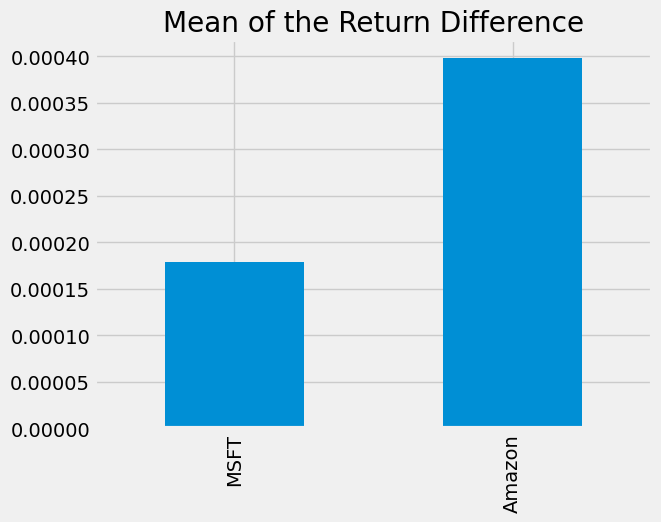

In [74]:
mean_excess_returns = excess_returns.mean()
mean_excess_returns.plot.bar(title= 'Mean of the Return Difference')
mean_excess_returns.describe()

The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference



In [ ]:
sd_excess_returns = excess_returns.std()

print(sd_excess_returns)

# plot the standard deviations
sd_excess_returns.plot(title="Standard Deviation of the Return Difference");

Putting all together

In [ ]:
daily_sharpe_ratio = mean_excess_returns.div(sd_excess_returns)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
print('Annual Sharp-Ratio: \n', annual_sharpe_ratio)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot(title="Annualized Sharpe Ration: Stocks vs S&P 500");



Given the two Sharpe ratios, which investment would be preferable?

While Amazon delivered higher returns than Microsoft, the latter had a higher Sharpe ratio in 2019. This indicates that, on a risk-adjusted basis, Microsoft provided better returns relative to the S&P 500 for each unit of risk taken by the investor.

In other words, Microsoft's investment was more attractive in terms of risk-adjusted performance. The primary reason for this difference was not the returns themselves, but the level of risk. Amazon had slightly higher volatility (as measured by standard deviation) compared to Microsoft, which led to Microsoft’s higher Sharpe ratio largely due to its lower risk.

However, when evaluating a portfolio, it is crucial to assess the performance of the entire portfolio rather than focusing solely on individual assets. While a higher Sharpe ratio is generally better, the number itself doesn’t hold much meaning in isolation. It only becomes useful when comparing one fund’s Sharpe ratio to another or to a group of funds, as this helps gauge relative risk-adjusted returns.

